# Moiré Lattice Basics

This notebook demonstrates the basic usage of the Moiré Lattice library for creating and visualizing moiré patterns formed by overlapping 2D lattices.

## Contents
1. **Creating Basic Lattices** - Generate hexagonal and other 2D lattices
2. **Building Moiré Patterns** - Apply transformations to create moiré lattices  
3. **Visualization** - Plot individual lattices and combined moiré patterns
4. **Analysis** - Inspect moiré properties like period ratios and commensurability

Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
import math

# Import the moiré lattice library
import moire_lattice_py as ml

print(f"Moiré Lattice Library Version: {ml.version()}")

# Set up matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

Moiré Lattice Library Version: 0.1.1


## 1. Creating Basic Lattices

Let's start by creating a hexagonal lattice, which is commonly used in studies of graphene and other 2D materials.

In [2]:
# Create a hexagonal lattice with lattice constant a = 1.0
lattice_constant = 1.0
hex_lattice = ml.create_hexagonal_lattice(lattice_constant)

print("Hexagonal Lattice Properties:")
print(f"Lattice constant: {lattice_constant}")
print(f"Bravais type: {hex_lattice.bravais_type()}")
print(f"Unit cell area: {hex_lattice.unit_cell_area():.4f}")

# Get lattice vectors
a1, a2 = hex_lattice.lattice_vectors()
print(f"Lattice vectors:")
print(f"  a1 = ({a1[0]:.4f}, {a1[1]:.4f})")
print(f"  a2 = ({a2[0]:.4f}, {a2[1]:.4f})")

# Get reciprocal lattice vectors
g1, g2 = hex_lattice.reciprocal_vectors()
print(f"Reciprocal lattice vectors:")
print(f"  g1 = ({g1[0]:.4f}, {g1[1]:.4f})")
print(f"  g2 = ({g2[0]:.4f}, {g2[1]:.4f})")

Hexagonal Lattice Properties:
Lattice constant: 1.0
Bravais type: Hexagonal
Unit cell area: 0.8660
Lattice vectors:
  a1 = (1.0000, 0.0000)
  a2 = (-0.5000, 0.8660)
Reciprocal lattice vectors:
  g1 = (6.2832, 3.6276)
  g2 = (-0.0000, 7.2552)


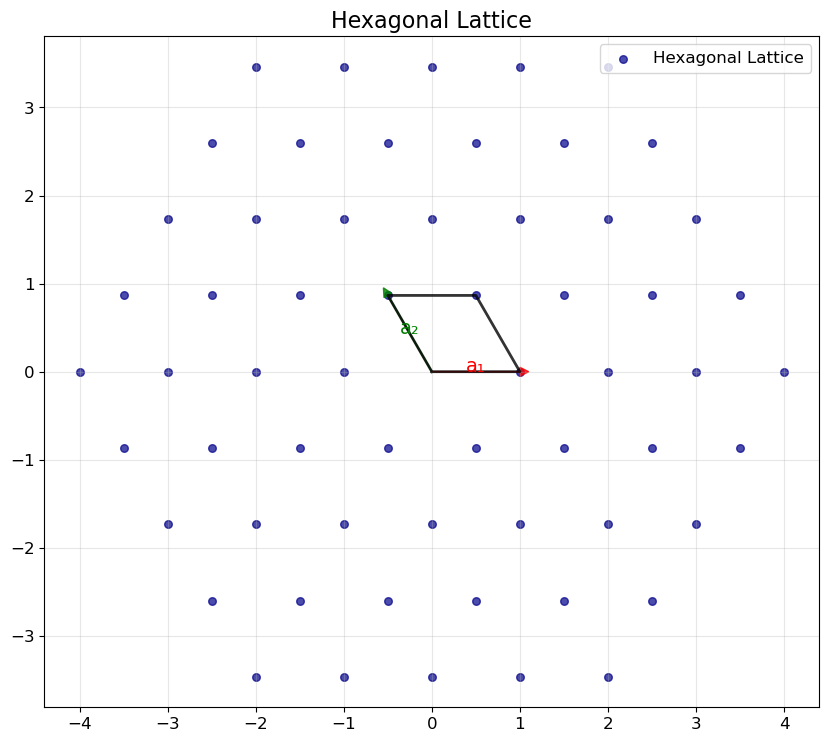

In [3]:
def plot_lattice(lattice, radius=5.0, title="Lattice", color='blue', alpha=0.7, ax=None, show_unit_cell=True):
    """Plot a 2D lattice with optional unit cell visualization."""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Generate lattice points within the radius
    points = lattice.generate_points(radius)
    
    if points:
        x_coords, y_coords = zip(*points)
        ax.scatter(x_coords, y_coords, c=color, alpha=alpha, s=30, label=title)
    
    # Plot unit cell if requested
    if show_unit_cell:
        a1, a2 = lattice.lattice_vectors()
        # Unit cell vertices
        vertices = np.array([[0, 0], [a1[0], a1[1]], [a1[0]+a2[0], a1[1]+a2[1]], [a2[0], a2[1]], [0, 0]])
        ax.plot(vertices[:, 0], vertices[:, 1], 'k-', linewidth=2, alpha=0.8)
        
        # Add lattice vector arrows
        ax.arrow(0, 0, a1[0], a1[1], head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.8)
        ax.arrow(0, 0, a2[0], a2[1], head_width=0.1, head_length=0.1, fc='green', ec='green', alpha=0.8)
        ax.text(a1[0]/2, a1[1]/2, 'a₁', fontsize=14, color='red', ha='center')
        ax.text(a2[0]/2, a2[1]/2, 'a₂', fontsize=14, color='green', ha='center')
    
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=16)
    ax.legend()
    
    return ax

# Plot the hexagonal lattice
plot_lattice(hex_lattice, radius=4.0, title="Hexagonal Lattice", color='darkblue')
plt.show()

## 2. Creating Moiré Patterns

Now let's create a moiré pattern by applying a rotation and scaling transformation to our hexagonal lattice. We'll use the `PyMoireBuilder` to construct the moiré lattice.

In [4]:
# Create a moiré pattern with a small twist angle and slight scaling
twist_angle = 5.0 * np.pi / 180  # 5 degrees in radians
scale_factor = 1.02  # 2% scaling

# Method 1: Using the MoireBuilder
builder = ml.PyMoireBuilder()
builder.with_base_lattice(hex_lattice)
builder.with_twist_and_scale(twist_angle, scale_factor)

moire_lattice = builder.build()

print("Moiré Lattice Properties:")
print(f"Twist angle: {moire_lattice.twist_angle_degrees():.2f}°")
print(f"Scale factor: {scale_factor}")
print(f"Is commensurate: {moire_lattice.is_commensurate()}")
print(f"Moiré period ratio: {moire_lattice.moire_period_ratio():.2f}")
print(f"Moiré unit cell area: {moire_lattice.cell_area():.4f}")

# Get the constituent lattices
lattice_1 = moire_lattice.lattice_1()
lattice_2 = moire_lattice.lattice_2()

print(f"Lattice 1 area: {lattice_1.unit_cell_area():.4f}")
print(f"Lattice 2 area: {lattice_2.unit_cell_area():.4f}")

Moiré Lattice Properties:
Twist angle: 5.00°
Scale factor: 1.02
Is commensurate: False
Moiré period ratio: 11.29
Moiré unit cell area: 110.3801
Lattice 1 area: 0.8660
Lattice 2 area: 0.9010


In [5]:
# Method 2: Using the convenience function for twisted bilayer
twist_angle_simple = 3.0 * np.pi / 180  # 3 degrees
moire_simple = ml.py_twisted_bilayer(hex_lattice, twist_angle_simple)

print(f"\nSimple Twisted Bilayer:")
print(f"Twist angle: {moire_simple.twist_angle_degrees():.2f}°")
print(f"Moiré period ratio: {moire_simple.moire_period_ratio():.2f}")
print(f"Is commensurate: {moire_simple.is_commensurate()}")


Simple Twisted Bilayer:
Twist angle: 3.00°
Moiré period ratio: 19.10
Is commensurate: False


## 3. Visualization

Let's visualize the individual lattices and the resulting moiré pattern. We'll create a comprehensive plot showing:
1. The original lattice (Lattice 1)
2. The transformed lattice (Lattice 2) 
3. Both lattices overlaid
4. The moiré superlattice

/tmp/ipykernel_72557/509709656.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


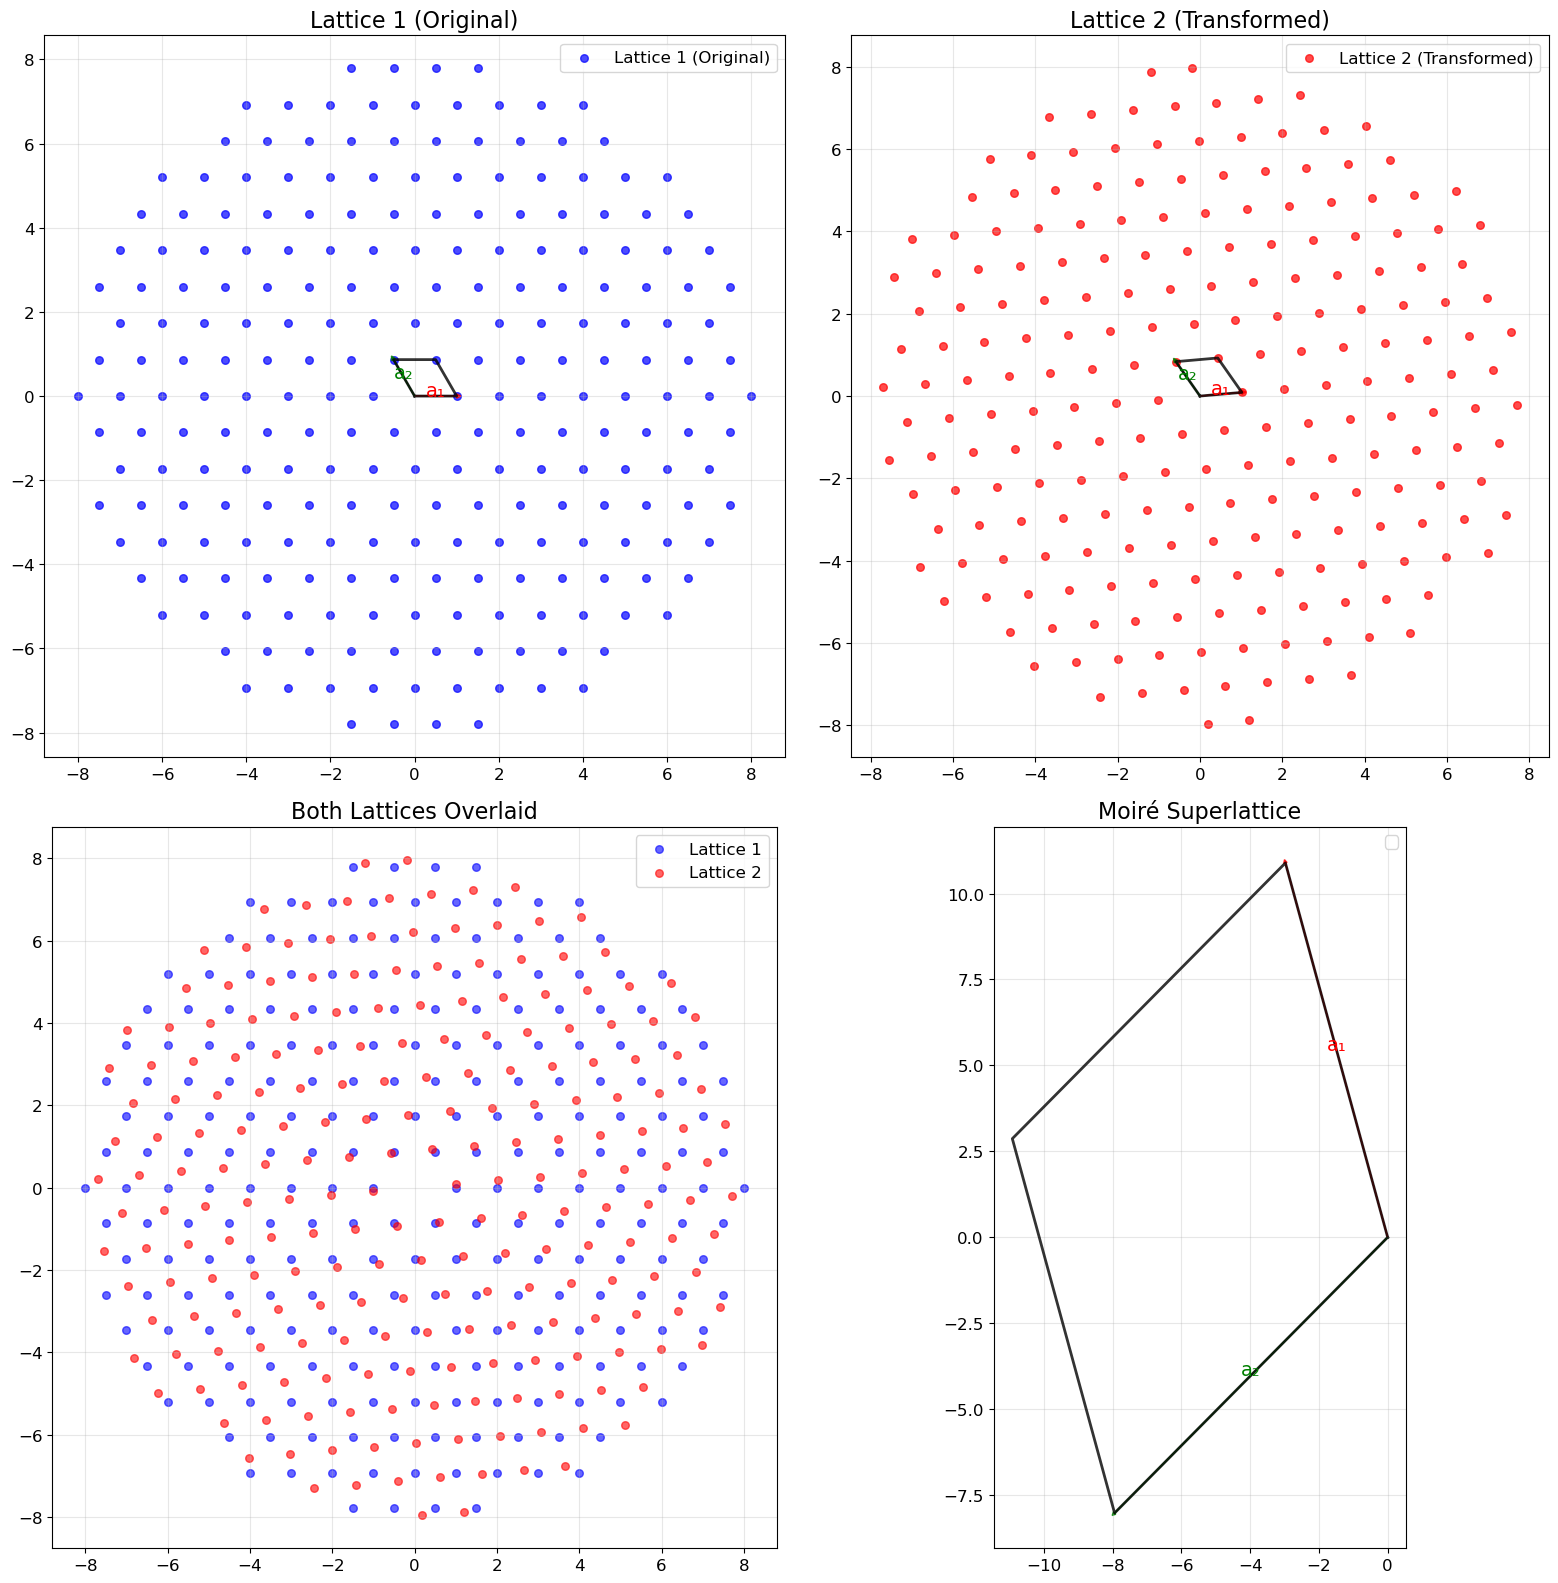

In [6]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
plot_radius = 8.0  # Large radius to see the moiré pattern clearly

# Plot 1: Original lattice (Lattice 1)
plot_lattice(lattice_1, radius=plot_radius, title="Lattice 1 (Original)", 
             color='blue', alpha=0.7, ax=axes[0,0], show_unit_cell=True)

# Plot 2: Transformed lattice (Lattice 2)  
plot_lattice(lattice_2, radius=plot_radius, title="Lattice 2 (Transformed)", 
             color='red', alpha=0.7, ax=axes[0,1], show_unit_cell=True)

# Plot 3: Both lattices overlaid
ax3 = axes[1,0]
plot_lattice(lattice_1, radius=plot_radius, title="", color='blue', alpha=0.6, 
             ax=ax3, show_unit_cell=False)
plot_lattice(lattice_2, radius=plot_radius, title="", color='red', alpha=0.6, 
             ax=ax3, show_unit_cell=False)
ax3.set_title("Both Lattices Overlaid", fontsize=16)
ax3.legend(['Lattice 1', 'Lattice 2'])

# Plot 4: Moiré superlattice
moire_as_lattice = moire_lattice.as_lattice2d()
plot_lattice(moire_as_lattice, radius=plot_radius, title="Moiré Superlattice", 
             color='purple', alpha=0.8, ax=axes[1,1], show_unit_cell=True)

plt.tight_layout()
plt.show()

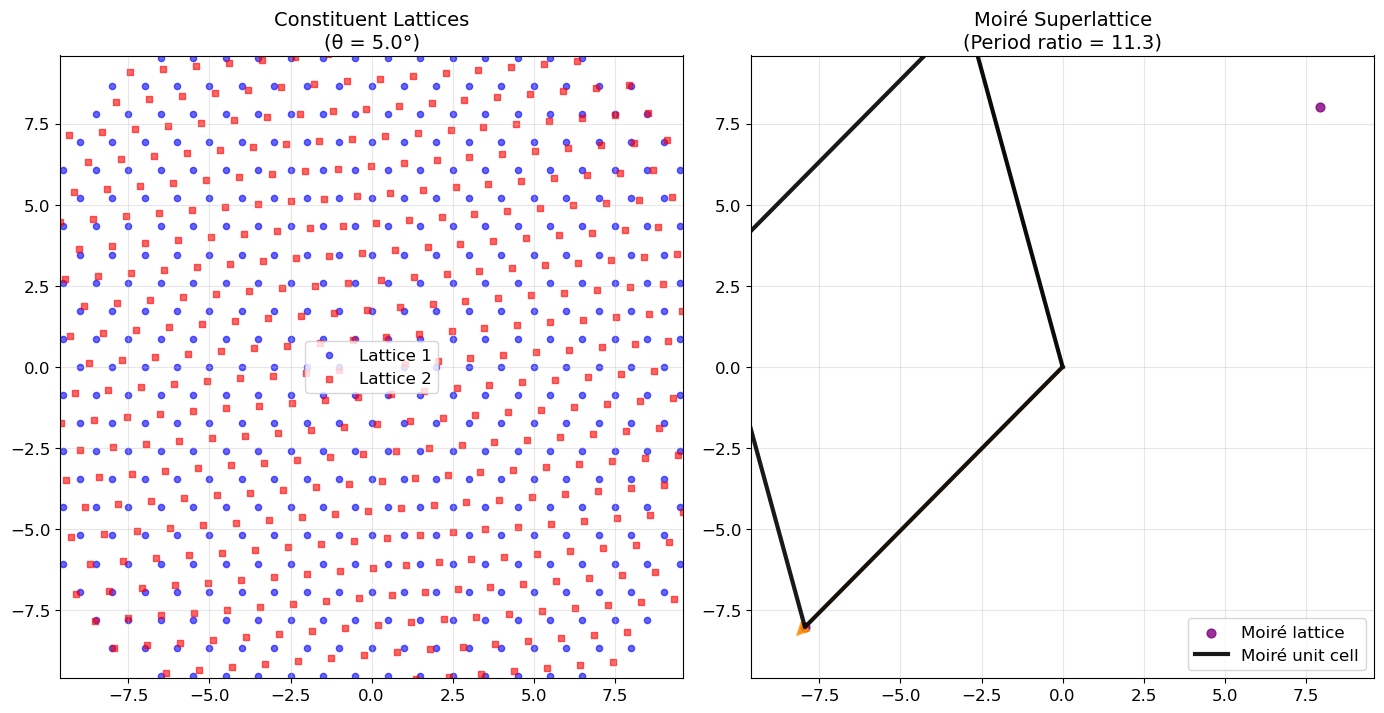

In [7]:
# Create a more compact visualization showing the moiré pattern clearly
def plot_moire_compact(moire_lattice, radius=15.0, figsize=(14, 10)):
    """Create a compact visualization of the moiré pattern."""
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Get the constituent lattices
    lattice_1 = moire_lattice.lattice_1()
    lattice_2 = moire_lattice.lattice_2()
    moire_super = moire_lattice.as_lattice2d()
    
    # Left plot: Overlaid constituent lattices
    ax1 = axes[0]
    
    # Generate points for both lattices
    points_1 = lattice_1.generate_points(radius)
    points_2 = lattice_2.generate_points(radius)
    
    if points_1:
        x1, y1 = zip(*points_1)
        ax1.scatter(x1, y1, c='blue', alpha=0.6, s=20, label='Lattice 1', marker='o')
    
    if points_2:
        x2, y2 = zip(*points_2)
        ax1.scatter(x2, y2, c='red', alpha=0.6, s=20, label='Lattice 2', marker='s')
    
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title(f'Constituent Lattices\n(θ = {moire_lattice.twist_angle_degrees():.1f}°)', fontsize=14)
    ax1.legend()
    ax1.set_xlim(-radius*0.8, radius*0.8)
    ax1.set_ylim(-radius*0.8, radius*0.8)
    
    # Right plot: Moiré superlattice with large unit cell
    ax2 = axes[1]
    
    # Plot moiré lattice points
    moire_points = moire_super.generate_points(radius)
    if moire_points:
        xm, ym = zip(*moire_points)
        ax2.scatter(xm, ym, c='purple', alpha=0.8, s=40, label='Moiré lattice')
    
    # Show the large moiré unit cell
    a1_m, a2_m = moire_super.lattice_vectors()
    vertices = np.array([[0, 0], [a1_m[0], a1_m[1]], 
                        [a1_m[0]+a2_m[0], a1_m[1]+a2_m[1]], 
                        [a2_m[0], a2_m[1]], [0, 0]])
    ax2.plot(vertices[:, 0], vertices[:, 1], 'k-', linewidth=3, alpha=0.9, label='Moiré unit cell')
    
    # Add lattice vector arrows
    ax2.arrow(0, 0, a1_m[0], a1_m[1], head_width=0.3, head_length=0.3, 
              fc='darkgreen', ec='darkgreen', alpha=0.8, linewidth=2)
    ax2.arrow(0, 0, a2_m[0], a2_m[1], head_width=0.3, head_length=0.3, 
              fc='darkorange', ec='darkorange', alpha=0.8, linewidth=2)
    
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title(f'Moiré Superlattice\n(Period ratio = {moire_lattice.moire_period_ratio():.1f})', fontsize=14)
    ax2.legend()
    ax2.set_xlim(-radius*0.8, radius*0.8)
    ax2.set_ylim(-radius*0.8, radius*0.8)
    
    plt.tight_layout()
    return fig

# Create the compact visualization
fig = plot_moire_compact(moire_lattice, radius=12.0)
plt.show()

## 4. Analysis and Exploration

Let's analyze different properties of our moiré lattices and explore how changing parameters affects the resulting patterns.

Twist Angle Analysis:
Angle (°) | Period Ratio | Moiré Area | Commensurate
--------------------------------------------------
   1.0   |    57.30     | 2843.0659   | False
  10.0   |     5.74     |  28.5022   | False


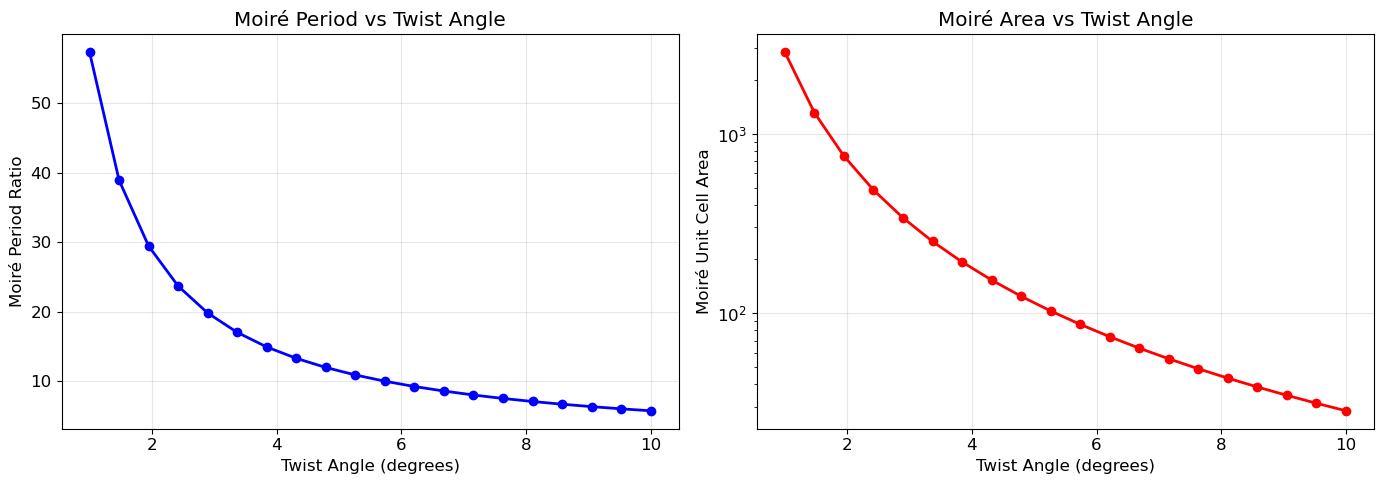

In [9]:
# Analyze how twist angle affects the moiré period
angles_deg = np.linspace(1, 10, 20)  # From 1 to 10 degrees
period_ratios = []
areas = []

print("Twist Angle Analysis:")
print("Angle (°) | Period Ratio | Moiré Area | Commensurate")
print("-" * 50)

for angle_deg in angles_deg:
    angle_rad = angle_deg * np.pi / 180
    try:
        moire_test = ml.py_twisted_bilayer(hex_lattice, angle_rad)
        period_ratio = moire_test.moire_period_ratio()
        area = moire_test.cell_area()
        commensurate = moire_test.is_commensurate()
        
        period_ratios.append(period_ratio)
        areas.append(area)
        
        if angle_deg in [1, 2, 3, 5, 7, 10]:  # Print selected values
            print(f"{angle_deg:6.1f}   | {period_ratio:8.2f}     | {area:8.4f}   | {commensurate}")
            
    except Exception as e:
        print(f"Error at angle {angle_deg}°: {e}")
        period_ratios.append(np.nan)
        areas.append(np.nan)

# Plot the relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(angles_deg, period_ratios, 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('Twist Angle (degrees)')
ax1.set_ylabel('Moiré Period Ratio')
ax1.set_title('Moiré Period vs Twist Angle')
ax1.grid(True, alpha=0.3)

ax2.semilogy(angles_deg, areas, 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('Twist Angle (degrees)')
ax2.set_ylabel('Moiré Unit Cell Area')
ax2.set_title('Moiré Area vs Twist Angle')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Explore different types of transformations
print("Exploring Different Transformation Types:")
print("=" * 40)

# 1. Pure rotation (no scaling)
builder_rot = ml.PyMoireBuilder()
builder_rot.with_base_lattice(hex_lattice)
builder_rot.with_twist_and_scale(7.0 * np.pi / 180, 1.0)  # 7° rotation, no scaling
moire_rot = builder_rot.build()

print(f"1. Pure Rotation (7°):")
print(f"   Period ratio: {moire_rot.moire_period_ratio():.2f}")
print(f"   Twist angle: {moire_rot.twist_angle_degrees():.1f}°")

# 2. Pure scaling (no rotation)
builder_scale = ml.PyMoireBuilder()
builder_scale.with_base_lattice(hex_lattice)
builder_scale.with_anisotropic_scale(1.05, 1.05)  # 5% uniform scaling
moire_scale = builder_scale.build()

print(f"\n2. Pure Scaling (5%):")
print(f"   Period ratio: {moire_scale.moire_period_ratio():.2f}")
print(f"   Twist angle: {moire_scale.twist_angle_degrees():.1f}°")

# 3. Anisotropic scaling
builder_aniso = ml.PyMoireBuilder()
builder_aniso.with_base_lattice(hex_lattice)
builder_aniso.with_anisotropic_scale(1.1, 0.95)  # Different scaling in x and y
moire_aniso = builder_aniso.build()

print(f"\n3. Anisotropic Scaling (x: +10%, y: -5%):")
print(f"   Period ratio: {moire_aniso.moire_period_ratio():.2f}")
print(f"   Twist angle: {moire_aniso.twist_angle_degrees():.1f}°")

# 4. Shear transformation
builder_shear = ml.PyMoireBuilder()
builder_shear.with_base_lattice(hex_lattice)
builder_shear.with_shear(0.1, 0.05)  # Small shear
moire_shear = builder_shear.build()

print(f"\n4. Shear Transformation:")
print(f"   Period ratio: {moire_shear.moire_period_ratio():.2f}")
print(f"   Twist angle: {moire_shear.twist_angle_degrees():.1f}°")

Exploring Different Transformation Types:
1. Pure Rotation (7°):
   Period ratio: 8.19
   Twist angle: 7.0°

2. Pure Scaling (5%):
   Period ratio: 21.00
   Twist angle: 0.0°

3. Anisotropic Scaling (x: +10%, y: -5%):
   Period ratio: 14.46
   Twist angle: 0.0°

4. Shear Transformation:
   Period ratio: 14.11
   Twist angle: 0.0°


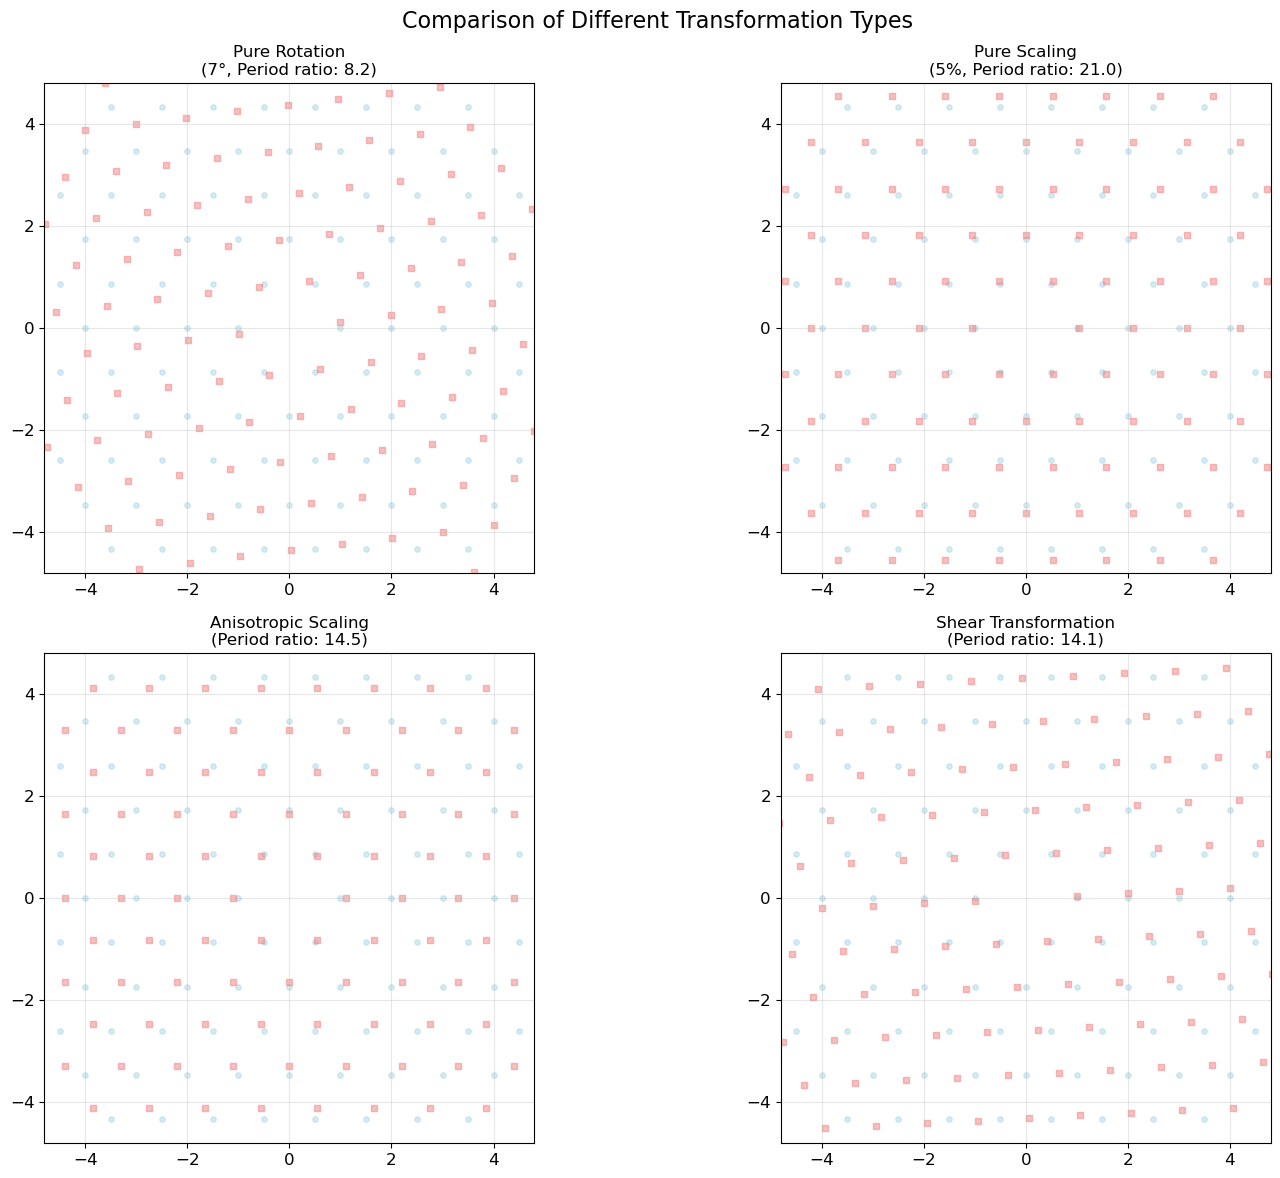

In [11]:
# Visualize the different transformation types
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plot_radius_small = 6.0

moire_list = [moire_rot, moire_scale, moire_aniso, moire_shear]
titles = [
    f"Pure Rotation\n(7°, Period ratio: {moire_rot.moire_period_ratio():.1f})",
    f"Pure Scaling\n(5%, Period ratio: {moire_scale.moire_period_ratio():.1f})",
    f"Anisotropic Scaling\n(Period ratio: {moire_aniso.moire_period_ratio():.1f})",
    f"Shear Transformation\n(Period ratio: {moire_shear.moire_period_ratio():.1f})"
]
colors = ['darkblue', 'darkgreen', 'darkorange', 'darkred']

for i, (moire, title, color) in enumerate(zip(moire_list, titles, colors)):
    ax = axes[i//2, i%2]
    
    # Plot constituent lattices
    lattice_1 = moire.lattice_1()
    lattice_2 = moire.lattice_2()
    
    points_1 = lattice_1.generate_points(plot_radius_small)
    points_2 = lattice_2.generate_points(plot_radius_small)
    
    if points_1:
        x1, y1 = zip(*points_1)
        ax.scatter(x1, y1, c='lightblue', alpha=0.5, s=15, marker='o')
    
    if points_2:
        x2, y2 = zip(*points_2)
        ax.scatter(x2, y2, c='lightcoral', alpha=0.5, s=15, marker='s')
    
    # Plot moiré superlattice
    moire_super = moire.as_lattice2d()
    moire_points = moire_super.generate_points(plot_radius_small)
    if moire_points:
        xm, ym = zip(*moire_points)
        ax.scatter(xm, ym, c=color, alpha=0.9, s=40, marker='D')
    
    # Show moiré unit cell
    a1_m, a2_m = moire_super.lattice_vectors()
    if abs(a1_m[0]) < plot_radius_small and abs(a1_m[1]) < plot_radius_small:
        vertices = np.array([[0, 0], [a1_m[0], a1_m[1]], 
                            [a1_m[0]+a2_m[0], a1_m[1]+a2_m[1]], 
                            [a2_m[0], a2_m[1]], [0, 0]])
        ax.plot(vertices[:, 0], vertices[:, 1], 'k-', linewidth=2, alpha=0.8)
    
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=12)
    ax.set_xlim(-plot_radius_small*0.8, plot_radius_small*0.8)
    ax.set_ylim(-plot_radius_small*0.8, plot_radius_small*0.8)

plt.suptitle('Comparison of Different Transformation Types', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()